<h1> Canny</h1>


En este tutorial vamos a explicar el algoritmo de Canny, un método muy utilizado para la detección de bordes en imágenes digitales. Antes de entrar en los detalles del algoritmo, es conveniente aclarar qué es un borde y por qué es importante detectarlo.

Un borde es una región de la imagen donde hay un cambio brusco o discontinuidad en la intensidad de los píxeles. Los bordes suelen corresponder a los contornos de los objetos o las superficies que componen la escena capturada por la cámara. La detección de bordes es una tarea fundamental en el procesamiento de imágenes y la visión artificial, ya que permite extraer información relevante sobre la forma, el tamaño y la posición de los elementos que aparecen en la imagen.

El algoritmo de Canny fue propuesto por John F. Canny en 1986 y se basa en un proceso de múltiples etapas que se describen a continuación:


1.   Reducción de ruido:  Se aplica un filtro gaussiano a la imagen original para suavizarla y eliminar el ruido que pueda afectar a la detección de bordes.
2.   Encontrar el gradiente de intensidad de la imagen:  Se utiliza un operador diferencial (como Sobel, Roberts o Prewitt) para obtener las componentes horizontal y vertical del gradiente de intensidad en cada píxel . A partir de estas componentes se calcula la magnitud y la dirección del gradiente, que indican respectivamente el nivel de contraste y la orientación perpendicular al borde .
     \begin{gathered}
      \text { Gradiente }(G)=\sqrt{G_x^2+G_y^2} \\
      \text { Ángulo }(\theta)=\tan ^{-1}\left(\frac{G_y}{G_x}\right)
      \end{gathered}
3.   Supresión no máxima: Se recorre la imagen buscando los píxeles que tengan una magnitud del gradiente mayor que sus vecinos en la dirección del gradiente . Estos píxeles se consideran candidatos a formar parte de los bordes, mientras que el resto se eliminan. De esta forma se consigue afinar los bordes y reducir su grosor.
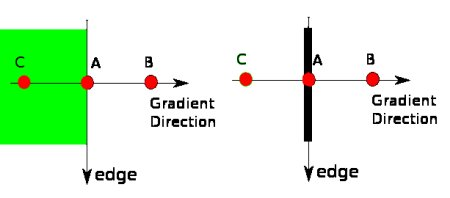

4. Umbralización con histéresis: Se establecen dos umbrales, uno alto y otro bajo, para clasificar los píxeles candidatos según su magnitud del gradiente . Los píxeles con una magnitud mayor que el umbral alto se aceptan como bordes; los píxeles con una magnitud menor que el umbral bajo se rechazan; y los píxeles con una magnitud entre ambos umbrales se aceptan solo si están conectados a algún píxel aceptado. De esta forma se evita romper los bordes por zonas débiles y se eliminan los falsos positivos causados por el ruido o las variaciones de color [1](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html).




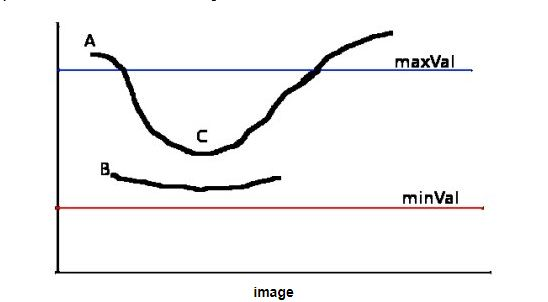

El resultado final es una imagen binaria donde solo quedan marcados los bordes más significativos de la imagen original.

A continuación mostramos un ejemplo práctico del algoritmo de Canny aplicado a una imagen utilizando OpenCV.

In [18]:
import numpy as np
import cv2

img = cv2.imread('imagenes/casa_borde.jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img,100,200)
imagen=cv2.hconcat([img,edges])   
cv2.imshow('canny',imagen)
cv2.waitKey(0) & 0xFF == 27   # Presionar 'Esc' 
cv2.destroyAllWindows()   # cierra toda las ventanas

<h2>Canny en tiempor real</h2>

In [19]:
import cv2 
import numpy as np  # np es un alias para la libreria de numpy
  
cap = cv2.VideoCapture(0)  
while True:
    ret, frame = cap.read()
    cv2.imshow('Original',frame)
    edges = cv2.Canny(frame,50,250,L2gradient=False) # Argumento imagen de entrada. Argumento2 umbral  minval. Argumento 3: umbral maxVal. Argumento 4: Tipo de norma L2gradient
    cv2.imshow('Edges',edges)
    if  cv2.waitKey(5) & 0xFF == 27: # Al presionar 'Esc' se sale del While y deja de capturar frames
        break
cap.release()  # Libera (desactiva la camara)
cv2.destroyAllWindows()   # cierra toda las ventanas